In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import hdbscan
from umap import UMAP
from scripts.data_cleaner import filter_top_cpv_categories
from scripts.preprocess_pipeline import create_pipeline_cat

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from scripts.data_cleaner import filter_top_cpv_categories
from scripts.preprocess_pipeline import create_pipeline_cat


In [4]:
data_path='../data/data_clean.csv'
model_save_path='../data'
top_n = 40
cpv_column = 'codeCPV_2_3'

In [5]:
df = pd.read_csv(data_path, encoding='utf-8')

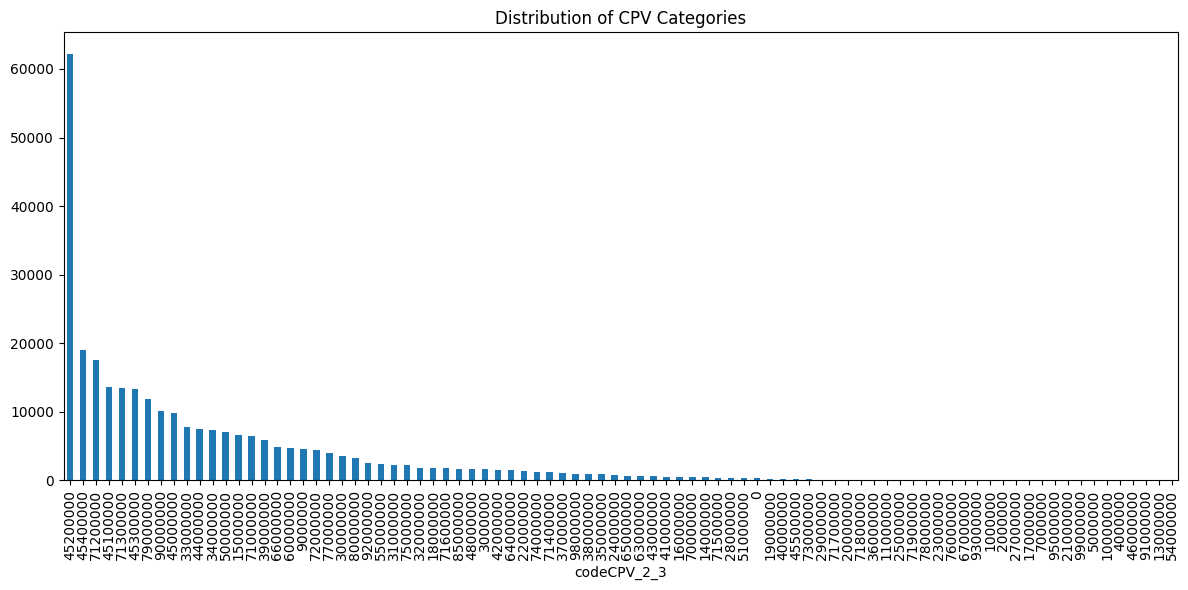

In [6]:
plt.figure(figsize=(12, 6))
df['codeCPV_2_3'].value_counts().plot(kind='bar')
plt.title('Distribution of CPV Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
df_cpv = filter_top_cpv_categories(df, top_n=40, cpv_column=cpv_column)

Filtered from 86 to 40 CPV categories, keeping 277627 rows out of 286850


In [8]:
df_cpv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277627 entries, 0 to 286849
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   uid                        277627 non-null  object 
 1   id                         277627 non-null  object 
 2   nature                     277627 non-null  object 
 3   acheteur_id                277627 non-null  int64  
 4   acheteur_nom               277441 non-null  object 
 5   acheteur_siren             277463 non-null  float64
 6   titulaire_id               277627 non-null  object 
 7   titulaire_typeIdentifiant  277627 non-null  object 
 8   titulaire_nom              270605 non-null  object 
 9   titulaire_siren            276603 non-null  float64
 10  objet                      277627 non-null  object 
 11  montant                    277627 non-null  float64
 12  codeCPV                    277627 non-null  object 
 13  procedure                  277627 

In [9]:
X_train, X_test = train_test_split(df_cpv, test_size=0.2, random_state=0, stratify=df_cpv[cpv_column])

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222101 entries, 257385 to 254309
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   uid                        222101 non-null  object 
 1   id                         222101 non-null  object 
 2   nature                     222101 non-null  object 
 3   acheteur_id                222101 non-null  int64  
 4   acheteur_nom               221949 non-null  object 
 5   acheteur_siren             221966 non-null  float64
 6   titulaire_id               222101 non-null  object 
 7   titulaire_typeIdentifiant  222101 non-null  object 
 8   titulaire_nom              216497 non-null  object 
 9   titulaire_siren            221301 non-null  float64
 10  objet                      222101 non-null  object 
 11  montant                    222101 non-null  float64
 12  codeCPV                    222101 non-null  object 
 13  procedure                  22

In [11]:
X_train['codeCPV_2_3'].unique()

array([45200000, 15000000, 55000000, 39000000, 45000000, 66000000,
        3000000, 30000000, 71200000, 45400000, 79000000, 71300000,
       44000000, 71000000, 77000000, 45300000, 45100000, 64000000,
       80000000, 72000000, 50000000, 85000000, 90000000, 74000000,
       34000000,  9000000, 33000000, 48000000, 60000000, 31000000,
       42000000, 22000000, 92000000, 71600000, 32000000, 18000000,
       37000000, 75000000, 98000000, 71400000])

In [12]:
pipeline = create_pipeline_cat('marche_sim')


In [13]:

X_train_preproc = pipeline.fit_transform(X_train)
X_test_preproc = pipeline.transform(X_test)

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [14]:
X_train_preproc.shape, X_test_preproc.shape

((222101, 66), (55526, 66))

In [16]:
X_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222101 entries, 0 to 222100
Data columns (total 66 columns):
 #   Column                                                                                Non-Null Count   Dtype  
---  ------                                                                                --------------   -----  
 0   offres_recues_pipeline__offresRecues                                                  222101 non-null  float64
 1   other_num_pipeline__montant                                                           222101 non-null  float64
 2   other_num_pipeline__dureeMois                                                         222101 non-null  float64
 3   binary_pipeline__sousTraitanceDeclaree                                                222101 non-null  float64
 4   binary_pipeline__origineFrance                                                        222101 non-null  float64
 5   binary_pipeline__marcheInnovant                                         

# PCA reduction

In [60]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.9)  # Keep enough components to explain 90% of variance
X_train_pca = pca.fit_transform(X_train_preproc)
X_test_pca = pca.transform(X_test_preproc)

print(f"Original dimensions: {X_train_preproc.shape[1]}")
print(f"Reduced dimensions: {X_train_pca.shape[1]}")
print(f"Explained variance: {sum(pca.explained_variance_ratio_):.2f}")

Original dimensions: 66
Reduced dimensions: 16
Explained variance: 0.91


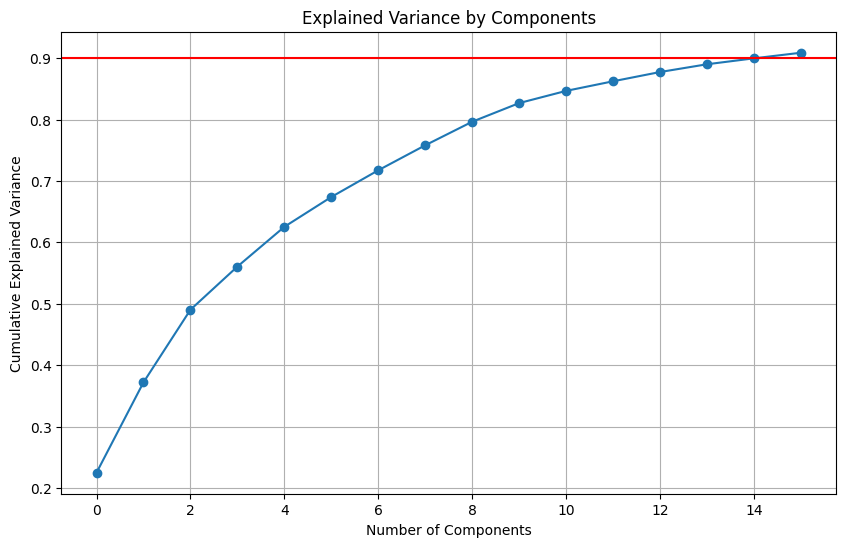

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


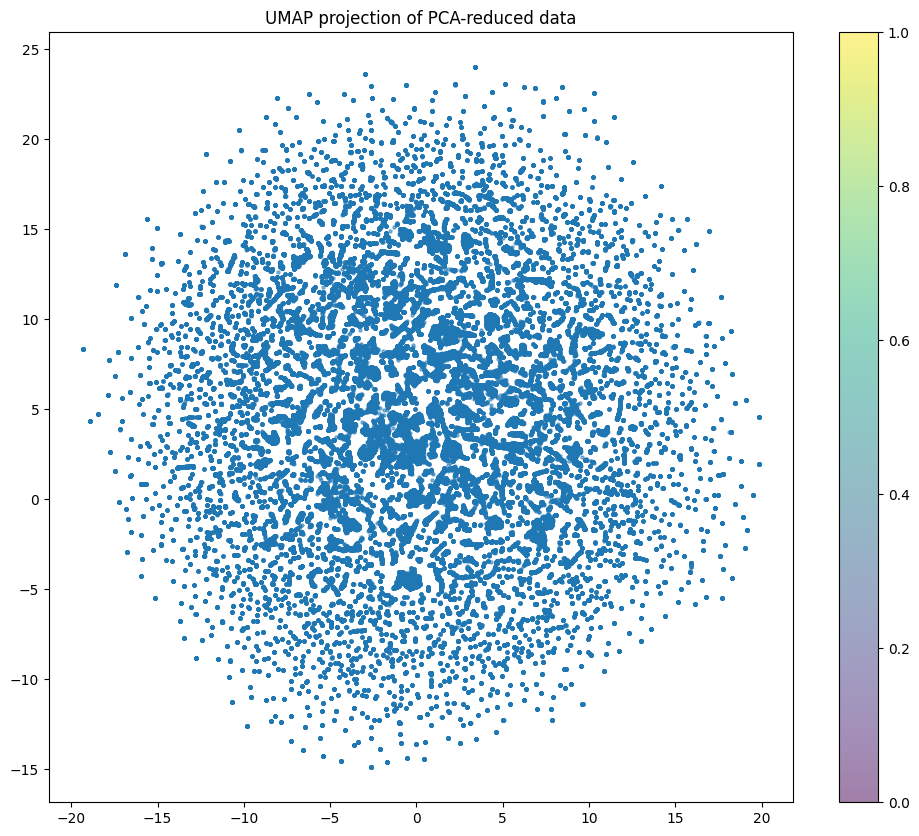

In [19]:
reducer = UMAP(n_neighbors=14, n_components=2, min_dist=0.01, random_state=0)
X_train_umap = reducer.fit_transform(X_train_pca)

# Plot UMAP projection
plt.figure(figsize=(12, 10))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], s=5, alpha=0.5)
plt.title('UMAP projection of PCA-reduced data')
plt.colorbar()
plt.show()

# HDBSCAN clustering 1st

In [ ]:
min_cluster_size': 55, 'min_samples': 20, 'cluster_selection_epsilon': 0.3},

In [20]:
# HDBSCAN hyperparameter exploration
#min_samples = 5  # Similar to DBSCAN's min_samples

results = []


# Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=55,   # best param
    min_samples=20,        # best param
    metric='euclidean',
    cluster_selection_epsilon=0.3,   # best param
    gen_min_span_tree=True,
    cluster_selection_method='eom'  # 'eom' is usually better for variable density
)
clusterer.fit(X_train_pca)
labels = clusterer.labels_
# Calculate metrics
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
noise_ratio = 100 * n_noise / len(X_train_pca)
results.append({
    'min_cluster_size': 20,
    'num_clusters': n_clusters,
    'noise_points': n_noise,
    'noise_percentage': noise_ratio
})
print("min_cluster_size = 20")
print(f"  Number of clusters: {n_clusters}")
print(f"  Number of noise points: {n_noise}")
print(f"  Percentage of noise: {noise_ratio:.2f}%")
# Calculate silhouette score if more than one cluster and not all noise
if n_clusters > 1 and n_noise < len(X_train_pca):
    # Filter out noise points
    mask = labels != -1
    silhouette_avg = silhouette_score(X_train_pca[mask], labels[mask])
    print(f"  Silhouette Score: {silhouette_avg:.3f}")
print()

# Display results table
results_df = pd.DataFrame(results)
results_df

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size = 20
  Number of clusters: 487
  Number of noise points: 80849
  Percentage of noise: 36.40%
  Silhouette Score: 0.101



,min_cluster_size,num_clusters,noise_points,noise_percentage
0,20,487,80849,36.401907


In [22]:
cluster_labels = clusterer.fit_predict(X_train_pca)

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [28]:
np.unique(cluster_labels)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

# Optimize HDBSCAN parameters

In [36]:
# Try different parameter combinations
parameter_grid = [
    {'min_cluster_size': 30, 'min_samples': 5, 'cluster_selection_epsilon': 0.3},
    {'min_cluster_size': 40, 'min_samples': 10, 'cluster_selection_epsilon': 0.4},
    {'min_cluster_size': 50, 'min_samples': 3, 'cluster_selection_epsilon': 0.5},
]

results = []
for params in parameter_grid:
    # Create clusterer with current parameters
    clusterer = hdbscan.HDBSCAN(**params, metric='euclidean')

    # Fit and predict
    labels = clusterer.fit_predict(X_train_pca)

    # Calculate metrics
    n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)
    noise_ratio = np.sum(labels == -1) / len(labels)

    # Calculate silhouette score if we have multiple clusters
    silhouette_avg = 0
    if n_clusters > 1:
        valid_points = labels != -1
        if np.sum(valid_points) > 1:
            silhouette_avg = silhouette_score(
                X_train_pca[valid_points],
                labels[valid_points]
            )

    # Store results
    results.append({
        'params': params,
        'n_clusters': n_clusters,
        'noise_ratio': noise_ratio,
        'silhouette_score': silhouette_avg
    })

# Display results as DataFrame
results_df = pd.DataFrame(results)
results_df

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.1

,params,n_clusters,noise_ratio,silhouette_score
0,"{'min_cluster_size': 30, 'min_samples': 5, 'cl...",1103,0.234123,0.083854
1,"{'min_cluster_size': 40, 'min_samples': 10, 'c...",699,0.262192,0.076315
2,"{'min_cluster_size': 50, 'min_samples': 3, 'cl...",669,0.157820,0.055385


larger clusters with moderate noise: Use the third configuration (min_cluster_size=50, min_samples=3, epsilon=0.5)

Try intermediate min_cluster_size values (35, 45)
Experiment with lower epsilon values (0.1, 0.2) for tighter clusters
Feature engineering: The low silhouette scores suggest the current data representation may not have strong natural clusters or may require additional features or transformations.


In [37]:
# Extended parameter grid for more focused clusters
extended_parameter_grid = [
    {'min_cluster_size': 35, 'min_samples': 10, 'cluster_selection_epsilon': 0.1},
    {'min_cluster_size': 55, 'min_samples': 20, 'cluster_selection_epsilon': 0.3},
    {'min_cluster_size': 250, 'min_samples': 25, 'cluster_selection_epsilon': 0.8}
]

# Run the same evaluation code with this extended grid
results = []
for params in extended_parameter_grid:
    # Create clusterer with current parameters
    clusterer = hdbscan.HDBSCAN(**params, metric='euclidean')

    # Fit and predict
    labels = clusterer.fit_predict(X_train_pca)

    # Calculate metrics
    n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)
    noise_ratio = np.sum(labels == -1) / len(labels)

    # Calculate silhouette score if we have multiple clusters
    silhouette_avg = 0
    if n_clusters > 1:
        valid_points = labels != -1
        if np.sum(valid_points) > 1:
            silhouette_avg = silhouette_score(
                X_train_pca[valid_points],
                labels[valid_points]
            )

    # Store results
    results.append({
        'params': params,
        'n_clusters': n_clusters,
        'noise_ratio': noise_ratio,
        'silhouette_score': silhouette_avg
    })

# Display results as DataFrame
extended_results_df = pd.DataFrame(results)
extended_results_df

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.1

,params,n_clusters,noise_ratio,silhouette_score
0,"{'min_cluster_size': 35, 'min_samples': 10, 'c...",956,0.339346,0.078063
1,"{'min_cluster_size': 55, 'min_samples': 20, 'c...",487,0.364019,0.101433
2,"{'min_cluster_size': 250, 'min_samples': 25, '...",61,0.236838,0.041886


In [38]:
# Choose the configuration with the best silhouette score
best_params = {'min_cluster_size': 55, 'min_samples': 20, 'cluster_selection_epsilon': 0.3}

# Create and fit the final clusterer
final_clusterer = hdbscan.HDBSCAN(
    min_cluster_size=best_params['min_cluster_size'],
    min_samples=best_params['min_samples'],
    cluster_selection_epsilon=best_params['cluster_selection_epsilon'],
    metric='euclidean',
    gen_min_span_tree=True,
    cluster_selection_method='eom'  # 'eom' is usually better for variable density
)

# Fit the model and get cluster assignments
cluster_labels = final_clusterer.fit_predict(X_train_pca)

# Add clusters to your original data
X_train_with_clusters = X_train.copy()
X_train_with_clusters['cluster'] = cluster_labels

# Calculate key metrics
n_clusters = len(np.unique(cluster_labels)) - (1 if -1 in cluster_labels else 0)
noise_ratio = np.sum(cluster_labels == -1) / len(cluster_labels)
print("Final model:")
print(f"  Number of clusters: {n_clusters}")
print(f"  Noise ratio: {noise_ratio:.2%}")

# Calculate silhouette score (excluding noise points)
valid_points = cluster_labels != -1
if np.sum(valid_points) > 1 and len(np.unique(cluster_labels[valid_points])) > 1:
    silhouette_avg = silhouette_score(
        X_train_pca[valid_points],
        cluster_labels[valid_points]
    )
    print(f"  Silhouette Score: {silhouette_avg:.3f}")

/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/loicdogon/.pyenv/versions/3.10.6/envs/decp_ml_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Final model:
  Number of clusters: 487
  Noise ratio: 36.40%
  Silhouette Score: 0.101


# Check cluster distribution

In [ ]:
#X_train_with_clusters = X_train.copy()
#X_train_with_clusters['cluster'] = cluster_labels

In [30]:
# Check cluster distribution
unique_clusters = np.unique(cluster_labels)
print(f"Number of clusters found: {len(unique_clusters) - (1 if -1 in unique_clusters else 0)}")
print("Cluster distribution:")
for cluster in unique_clusters:
    if cluster != -1:
        print(f"Cluster {cluster}: {np.sum(cluster_labels == cluster)} samples")
print(f"Noise points: {np.sum(cluster_labels == -1)} samples")

Number of clusters found: 487
Cluster distribution:
Cluster 0: 103 samples
Cluster 1: 140 samples
Cluster 2: 3892 samples
Cluster 3: 4343 samples
Cluster 4: 100 samples
Cluster 5: 449 samples
Cluster 6: 127 samples
Cluster 7: 317 samples
Cluster 8: 304 samples
Cluster 9: 321 samples
Cluster 10: 139 samples
Cluster 11: 67 samples
Cluster 12: 57 samples
Cluster 13: 193 samples
Cluster 14: 112 samples
Cluster 15: 66 samples
Cluster 16: 117 samples
Cluster 17: 212 samples
Cluster 18: 119 samples
Cluster 19: 99 samples
Cluster 20: 94 samples
Cluster 21: 102 samples
Cluster 22: 184 samples
Cluster 23: 80 samples
Cluster 24: 216 samples
Cluster 25: 362 samples
Cluster 26: 145 samples
Cluster 27: 188 samples
Cluster 28: 66 samples
Cluster 29: 183 samples
Cluster 30: 76 samples
Cluster 31: 127 samples
Cluster 32: 107 samples
Cluster 33: 82 samples
Cluster 34: 94 samples
Cluster 35: 69 samples
Cluster 36: 73 samples
Cluster 37: 72 samples
Cluster 38: 63 samples
Cluster 39: 92 samples
Cluster 40:

In [38]:
# Create a summary table for each cluster
cluster_summary = {}

for cluster_id in unique_clusters:
    if cluster_id == -1:
        continue

    cluster_data = X_train_with_clusters[X_train_with_clusters['cluster'] == cluster_id]

    # Gather key statistics
    summary = {
        'size': len(cluster_data),
        'pct_of_data': len(cluster_data) / len(X_train_with_clusters) * 100,
        'top_cpv': cluster_data['codeCPV_2_3'].value_counts().index[0],
        'top_cpv_pct': cluster_data['codeCPV_2_3'].value_counts().iloc[0] / len(cluster_data) * 100
    }

    # Add any numerical features
    for col in ['montant', 'dureeEnMois']:
        if col in cluster_data.columns:
            summary[f'avg_{col}'] = cluster_data[col].mean()
            summary[f'med_{col}'] = cluster_data[col].median()

    cluster_summary[cluster_id] = summary

# Convert to DataFrame and display
summary_df = pd.DataFrame.from_dict(cluster_summary, orient='index')
print("Cluster Summary:")
summary_df

Cluster Summary:


,size,pct_of_data,top_cpv,top_cpv_pct,avg_montant,med_montant
0,103,0.046375,45400000,31.067961,5.183198e+05,250033.020
1,140,0.063034,60000000,98.571429,3.022892e+06,2872727.280
2,3892,1.752356,45200000,27.774923,1.712184e+06,362442.280
3,4343,1.955417,45200000,28.252360,1.637525e+06,476534.390
4,100,0.045025,45200000,64.000000,6.689341e+05,557040.720
...,...,...,...,...,...,...
482,80,0.036020,45200000,63.750000,8.328478e+04,72280.500
483,120,0.054029,45200000,45.000000,4.610368e+05,319040.335
484,818,0.368301,45200000,50.244499,1.452818e+05,101471.870
485,87,0.039171,45200000,52.873563,7.192004e+05,600000.000


# Exploration of the clusters

In [39]:
# 1. Analyze the largest clusters
# ==============================
# Get the 10 largest clusters by size
largest_clusters = pd.Series(cluster_labels).value_counts()
largest_clusters = largest_clusters[largest_clusters.index != -1]  # Remove noise points
top_10_clusters = largest_clusters.nlargest(10).index

print("Top 10 largest clusters:")
for cluster in top_10_clusters:
    cluster_size = np.sum(cluster_labels == cluster)
    print(f"Cluster {cluster}: {cluster_size} samples ({cluster_size/len(X_train)*100:.2f}% of data)")

Top 10 largest clusters:
Cluster 3: 4343 samples (1.96% of data)
Cluster 2: 3892 samples (1.75% of data)
Cluster 436: 2727 samples (1.23% of data)
Cluster 468: 2316 samples (1.04% of data)
Cluster 430: 1963 samples (0.88% of data)
Cluster 355: 1934 samples (0.87% of data)
Cluster 381: 1791 samples (0.81% of data)
Cluster 278: 1685 samples (0.76% of data)
Cluster 470: 1626 samples (0.73% of data)
Cluster 350: 1550 samples (0.70% of data)


In [40]:
# 2. Analyze these top 10 clusters by their dominant features
# ===================================================
print("\n\nKey characteristics of largest clusters:")
for cluster in top_10_clusters:
    cluster_data = X_train_with_clusters[X_train_with_clusters['cluster'] == cluster]

    # Get top CPV codes
    top_cpvs = cluster_data['codeCPV_2_3'].value_counts().head(3)
    top_cpv_pcts = (top_cpvs / len(cluster_data) * 100).round(1)

    # Get numerical stats
    avg_amount = cluster_data['montant'].mean() if 'montant' in cluster_data.columns else 0
    med_amount = cluster_data['montant'].median() if 'montant' in cluster_data.columns else 0

    print(f"\nCluster {cluster} ({len(cluster_data)} samples):")
    print(f"  Top CPV codes: ")
    for i, (cpv, count) in enumerate(top_cpvs.items()):
        print(f"    - {cpv}: {count} contracts ({top_cpv_pcts.iloc[i]}%)")
    print(f"  Average amount: {avg_amount:,.2f}")
    print(f"  Median amount: {med_amount:,.2f}")



Key characteristics of largest clusters:

Cluster 3 (4343 samples):
  Top CPV codes: 
    - 45200000: 1227 contracts (28.3%)
    - 79000000: 305 contracts (7.0%)
    - 71300000: 283 contracts (6.5%)
  Average amount: 1,637,525.31
  Median amount: 476,534.39

Cluster 2 (3892 samples):
  Top CPV codes: 
    - 45200000: 1081 contracts (27.8%)
    - 71200000: 678 contracts (17.4%)
    - 71300000: 404 contracts (10.4%)
  Average amount: 1,712,183.65
  Median amount: 362,442.28

Cluster 436 (2727 samples):
  Top CPV codes: 
    - 45200000: 1287 contracts (47.2%)
    - 45400000: 628 contracts (23.0%)
    - 45300000: 379 contracts (13.9%)
  Average amount: 149,507.66
  Median amount: 96,265.00

Cluster 468 (2316 samples):
  Top CPV codes: 
    - 33000000: 738 contracts (31.9%)
    - 15000000: 496 contracts (21.4%)
    - 44000000: 122 contracts (5.3%)
  Average amount: 567,885.49
  Median amount: 240,000.00

Cluster 430 (1963 samples):
  Top CPV codes: 
    - 45200000: 782 contracts (39.8%)
 

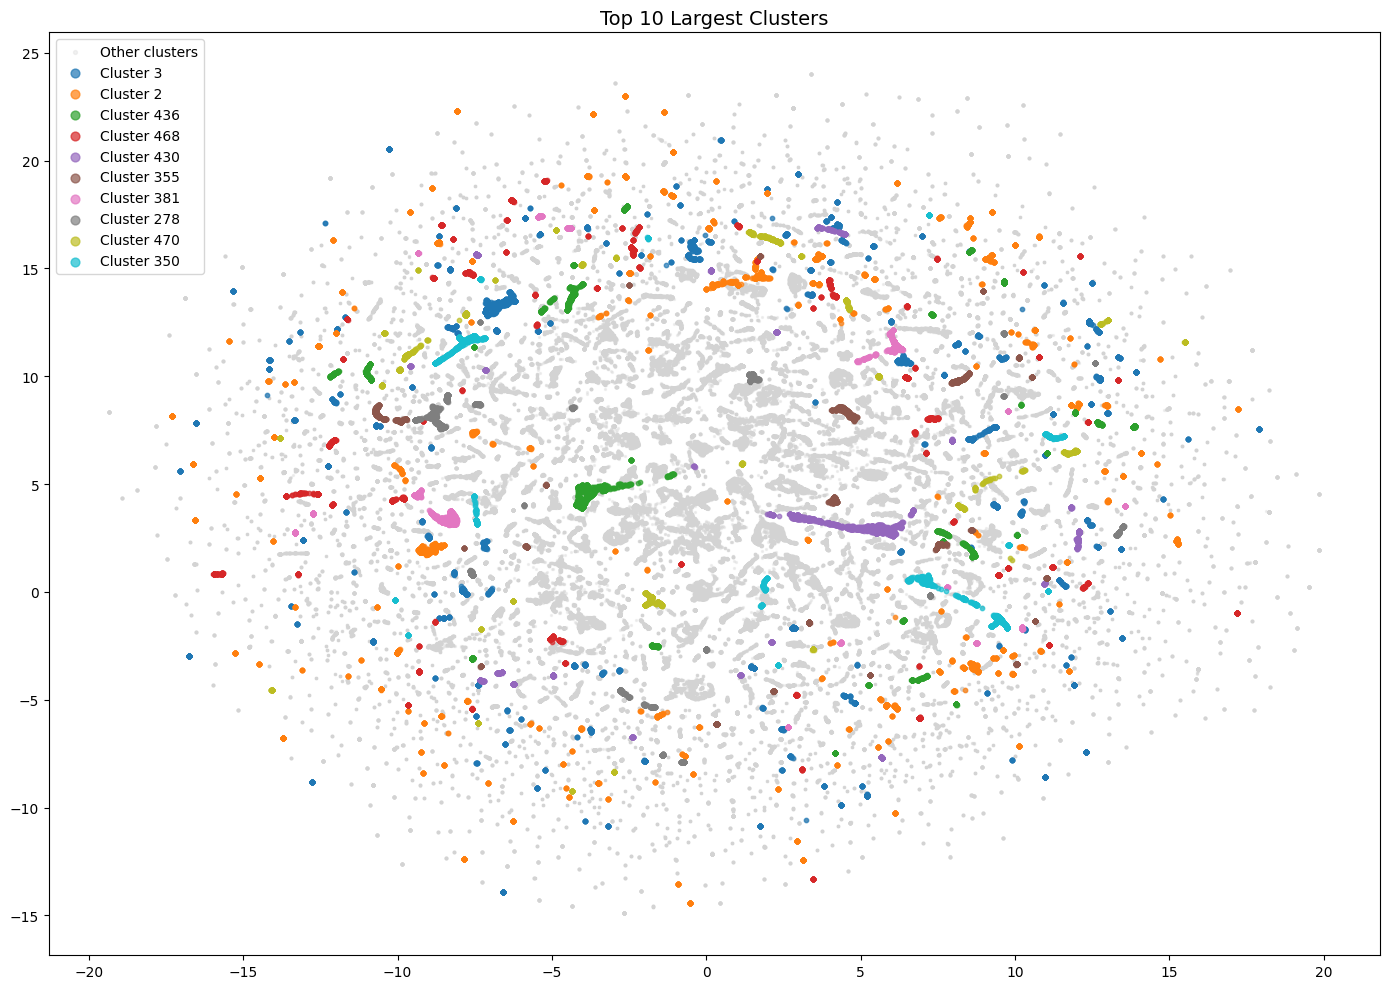

In [41]:
# 3. Visualize these top clusters
# ==============================
plt.figure(figsize=(14, 10))
# Create a mask for top clusters
is_top_cluster = np.isin(cluster_labels, top_10_clusters)
# Plot top clusters with specific colors and other clusters in gray
plt.scatter(X_train_umap[~is_top_cluster, 0], X_train_umap[~is_top_cluster, 1],
           color='lightgray', s=2, alpha=0.3, label='Other clusters')

# Use a custom colormap for top clusters
colors = plt.cm.tab10(np.linspace(0, 1, len(top_10_clusters)))
for i, cluster in enumerate(top_10_clusters):
    cluster_mask = cluster_labels == cluster
    plt.scatter(X_train_umap[cluster_mask, 0], X_train_umap[cluster_mask, 1],
               color=colors[i], s=10, alpha=0.7, label=f"Cluster {cluster}")

plt.title('Top 10 Largest Clusters', fontsize=14)
plt.legend(markerscale=2)
plt.tight_layout()
plt.show()

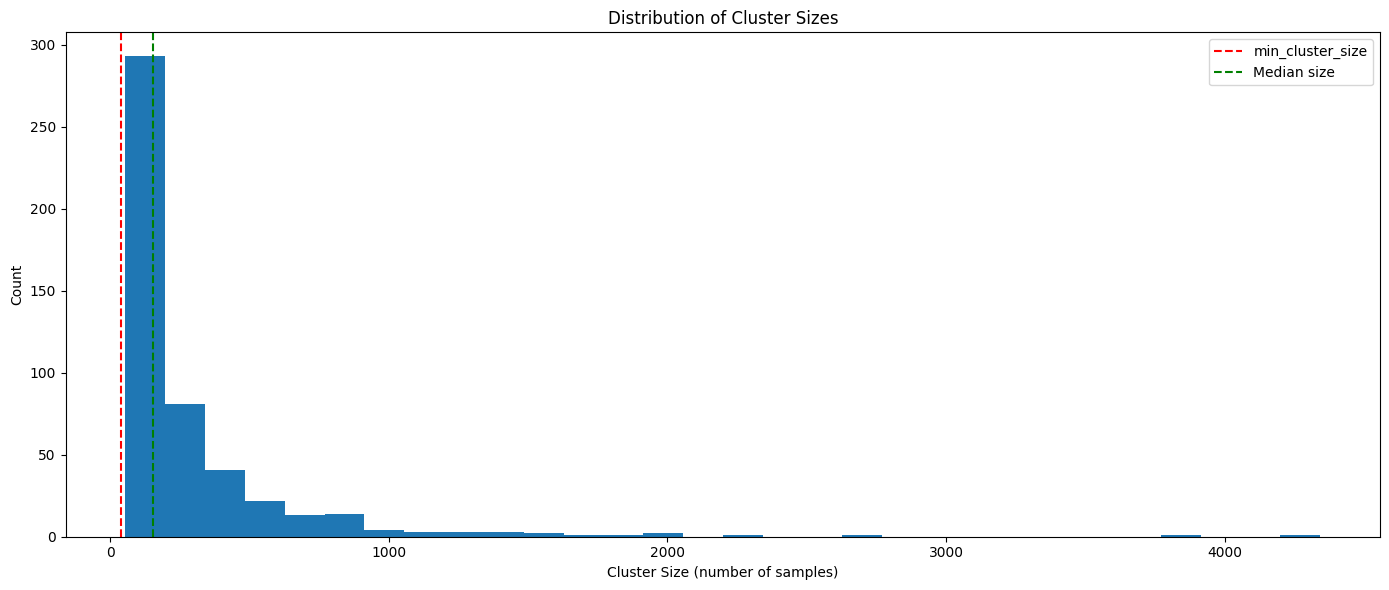

In [42]:
# 5. Create a histogram of cluster sizes to understand the distribution
# ====================================================================
plt.figure(figsize=(14, 6))
cluster_sizes = pd.Series(cluster_labels).value_counts()
cluster_sizes = cluster_sizes[cluster_sizes.index != -1]  # Remove noise
plt.hist(cluster_sizes.values, bins=30)
plt.xlabel('Cluster Size (number of samples)')
plt.ylabel('Count')
plt.title('Distribution of Cluster Sizes')
plt.axvline(x=40, color='r', linestyle='--', label='min_cluster_size')
plt.axvline(x=cluster_sizes.median(), color='g', linestyle='--', label='Median size')
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
# 7. Examine the feature importance for each cluster
# =================================================
# This approach uses a simple classifier to identify what features
# best distinguish each cluster from the rest
if X_train_preproc is not None:
    from sklearn.ensemble import RandomForestClassifier

    print("\nTop distinguishing features for each cluster:")
    for cluster in top_10_clusters:
        # Create binary target: 1 for this cluster, 0 for others
        y_binary = (cluster_labels == cluster).astype(int)

        # Train a simple model to distinguish this cluster
        rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
        try:
            # Sample for large datasets
            sample_size = min(50000, X_train_pca.shape[0])
            indices = np.random.choice(X_train_pca.shape[0], size=sample_size, replace=False)
            rf.fit(X_train_pca[indices], y_binary[indices])

            # Get feature importance
            importances = rf.feature_importances_
            top_indices = importances.argsort()[-5:][::-1]  # Top 5 features

            print(f"\nCluster {cluster} - Top distinguishing PCA components:")
            for idx in top_indices:
                print(f"  - PCA component {idx}: {importances[idx]:.4f}")

        except Exception as e:
            print(f"Could not analyze feature importance for cluster {cluster}: {str(e)}")


Top distinguishing features for each cluster:

Cluster 3 - Top distinguishing PCA components:
  - PCA component 9: 0.2258
  - PCA component 11: 0.1488
  - PCA component 8: 0.1198
  - PCA component 13: 0.1195
  - PCA component 6: 0.1020

Cluster 2 - Top distinguishing PCA components:
  - PCA component 13: 0.3738
  - PCA component 3: 0.1663
  - PCA component 8: 0.0884
  - PCA component 12: 0.0806
  - PCA component 6: 0.0780

Cluster 436 - Top distinguishing PCA components:
  - PCA component 3: 0.2570
  - PCA component 1: 0.1745
  - PCA component 10: 0.1347
  - PCA component 14: 0.1144
  - PCA component 15: 0.0788

Cluster 468 - Top distinguishing PCA components:
  - PCA component 10: 0.2987
  - PCA component 3: 0.1904
  - PCA component 1: 0.1370
  - PCA component 4: 0.1297
  - PCA component 8: 0.0760

Cluster 430 - Top distinguishing PCA components:
  - PCA component 7: 0.1916
  - PCA component 10: 0.1437
  - PCA component 14: 0.1285
  - PCA component 1: 0.1099
  - PCA component 5: 0.09

In [53]:
# Create profile for each cluster with more features
profiles = []

# Get top clusters for analysis
top_clusters = pd.Series(cluster_labels).value_counts()
top_clusters = top_clusters[top_clusters.index != -1]  # Remove noise points
top_10_clusters = top_clusters.nlargest(10).index

# Create a detailed profile for each cluster
for cluster_id in np.sort(np.unique(cluster_labels)):
    # Skip noise points
    if cluster_id == -1:
        continue

    # Get data for this cluster
    cluster_data = X_train_with_clusters[X_train_with_clusters['cluster'] == cluster_id]

    # Skip very small clusters
    if len(cluster_data) < 20:
        continue

    # Calculate key metrics
    profile = {
        'cluster_id': cluster_id,
        'size': len(cluster_data),
        'pct_total': round(len(cluster_data) / len(X_train_with_clusters) * 100, 2),

        # CPV characteristics
        'top_cpv': cluster_data['codeCPV_2_3'].value_counts().index[0],
        'top_cpv_pct': round(cluster_data['codeCPV_2_3'].value_counts().iloc[0] / len(cluster_data) * 100, 2),
        'cpv_diversity': len(cluster_data['codeCPV_2_3'].unique()),

        # Financial characteristics - format with 2 decimals and avoid scientific notation
        'mean_amount': round(cluster_data['montant'].mean(), 2) if 'montant' in cluster_data.columns else None,
        'median_amount': round(cluster_data['montant'].median(), 2) if 'montant' in cluster_data.columns else None,
        'amount_std': round(cluster_data['montant'].std(), 2) if 'montant' in cluster_data.columns else None,

        # Duration characteristics
        'mean_duration': round(cluster_data['dureeMois'].mean(), 2) if 'dureeMois' in cluster_data.columns else None,
        'median_duration': round(cluster_data['dureeMois'].median(), 2) if 'dureeMois' in cluster_data.columns else None,
    }

    # Add derived metrics
    if 'montant' in cluster_data.columns and 'dureeMois' in cluster_data.columns:
        if profile['median_duration'] is not None and profile['median_duration'] > 0:
            profile['euro_per_month'] = round(profile['median_amount'] / profile['median_duration'], 2)
        else:
            profile['euro_per_month'] = round(profile['median_amount'], 2)

    profiles.append(profile)

# When displaying the DataFrame, format to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

Cluster Profiles:


,cluster_id,size,pct_total,top_cpv,top_cpv_pct,cpv_diversity,mean_amount,median_amount,amount_std,mean_duration,median_duration,euro_per_month
3,3,4343,1.96,45200000,28.25,40,1637525.31,476534.39,4090601.35,32.88,36.00,13237.07
2,2,3892,1.75,45200000,27.77,37,1712183.65,362442.28,4149645.35,31.07,30.00,12081.41
436,436,2727,1.23,45200000,47.19,5,149507.66,96265.00,153599.76,12.89,12.00,8022.08
468,468,2316,1.04,33000000,31.87,29,567885.49,240000.00,1100534.62,45.51,48.00,5000.00
430,430,1963,0.88,45200000,39.84,5,136935.42,93031.00,124048.99,12.27,12.00,7752.58
355,355,1934,0.87,45200000,50.47,5,169255.39,103089.94,187590.01,12.72,12.00,8590.83
381,381,1791,0.81,45200000,48.86,5,144766.47,84537.40,177243.70,11.55,11.00,7685.22
278,278,1685,0.76,45200000,43.44,5,140750.17,97039.96,121494.49,13.45,12.00,8086.66
470,470,1626,0.73,33000000,24.66,30,592221.25,215856.00,1031048.94,44.74,48.00,4497.00
350,350,1550,0.70,45200000,45.23,5,139089.42,91416.56,124347.54,12.08,12.00,7618.05


*Size and Percentage Metrics*\
size: The number of contracts/data points in each cluster\
pct_total: The percentage of the total dataset that this cluster represents

*CPV Code Metrics*\
top_cpv: The most common CPV code in the cluster\
top_cpv_pct: The percentage of contracts within the cluster that have this top CPV code\
Interpretation: Higher values mean the cluster is more homogeneous in terms of CPV codes\

cpv_diversity: The number of unique CPV codes present in the cluster\

*Financial Metrics*\
mean_amount: The average contract amount in the cluster\
median_amount: The median contract amount (more robust to outliers)\
amount_std: The standard deviation of contract amounts (measures variability)\

*Duration Metrics*\
mean_duration: The average duration of contracts in months\
median_duration: The median duration of contracts in months\

Derived Metrics\
euro_per_month: The median amount divided by the median duration\
Formula: median_amount / median_duration\
Interpretation: This represents the monthly "cost" or "value" of contracts in the cluster

In [63]:

# Convert to DataFrame for easier analysis
profiles_df = pd.DataFrame(profiles).sort_values('size', ascending=False)
print("Cluster Profiles:")
profiles_df.head(40)  # Show top 10 clusters by size

Cluster Profiles:


,cluster_id,size,pct_total,top_cpv,top_cpv_pct,cpv_diversity,mean_amount,median_amount,amount_std,mean_duration,median_duration,euro_per_month
3,3,4343,1.96,45200000,28.25,40,1637525.31,476534.39,4090601.35,32.88,36.00,13237.07
2,2,3892,1.75,45200000,27.77,37,1712183.65,362442.28,4149645.35,31.07,30.00,12081.41
436,436,2727,1.23,45200000,47.19,5,149507.66,96265.00,153599.76,12.89,12.00,8022.08
468,468,2316,1.04,33000000,31.87,29,567885.49,240000.00,1100534.62,45.51,48.00,5000.00
430,430,1963,0.88,45200000,39.84,5,136935.42,93031.00,124048.99,12.27,12.00,7752.58
355,355,1934,0.87,45200000,50.47,5,169255.39,103089.94,187590.01,12.72,12.00,8590.83
381,381,1791,0.81,45200000,48.86,5,144766.47,84537.40,177243.70,11.55,11.00,7685.22
278,278,1685,0.76,45200000,43.44,5,140750.17,97039.96,121494.49,13.45,12.00,8086.66
470,470,1626,0.73,33000000,24.66,30,592221.25,215856.00,1031048.94,44.74,48.00,4497.00
350,350,1550,0.70,45200000,45.23,5,139089.42,91416.56,124347.54,12.08,12.00,7618.05


In [56]:
# Group clusters by dominant CPV code
cpv_groups = profiles_df.groupby('top_cpv')
for cpv, group in cpv_groups:
    print(f"\n==== Clusters dominated by {cpv} ====")
    print(group[['cluster_id', 'size', 'top_cpv_pct', 'median_amount', 'median_duration']])


==== Clusters dominated by 9000000 ====
     cluster_id  size  top_cpv_pct  median_amount  median_duration
360         360   114        28.07       60000.00             1.00
443         443    87        14.94      140000.00            12.00
297         297    62        32.26      100000.00             1.00

==== Clusters dominated by 15000000 ====
     cluster_id  size  top_cpv_pct  median_amount  median_duration
410         410  1002        16.47      240000.00            48.00
425         425   805        18.63      240000.00            48.00
411         411   804        22.64      237322.84            48.00
441         441   696        18.25      216164.10            48.00
379         379   602        14.95      240000.00            48.00
357         357   442        18.33      137000.00            48.00
450         450   390        14.36       90000.00            48.00
389         389   371        27.22      180000.00            48.00
472         472   274        14.96      220000

Financial/Duration Sub-segments: Within each CPV category, the clusters typically differentiate by:

Contract amount (e.g., small vs. large contracts)\
Duration (e.g., short-term 1-12 month vs. long-term 48 month contracts)\

High vs. Low CPV Purity:\
Some clusters have very high CPV purity (e.g., cluster 56 with 100% "33000000")\
Most have moderate purity (20-50%)\
Many have low purity (10-20%)\

Pattern by CPV Type:\
Construction work (45200000): Many clusters (173!) with varying amounts\
Medical equipment (33000000): Well-defined clusters with typical 48-month durations\
IT services (72000000): Mostly 48-month contracts with varying amounts\


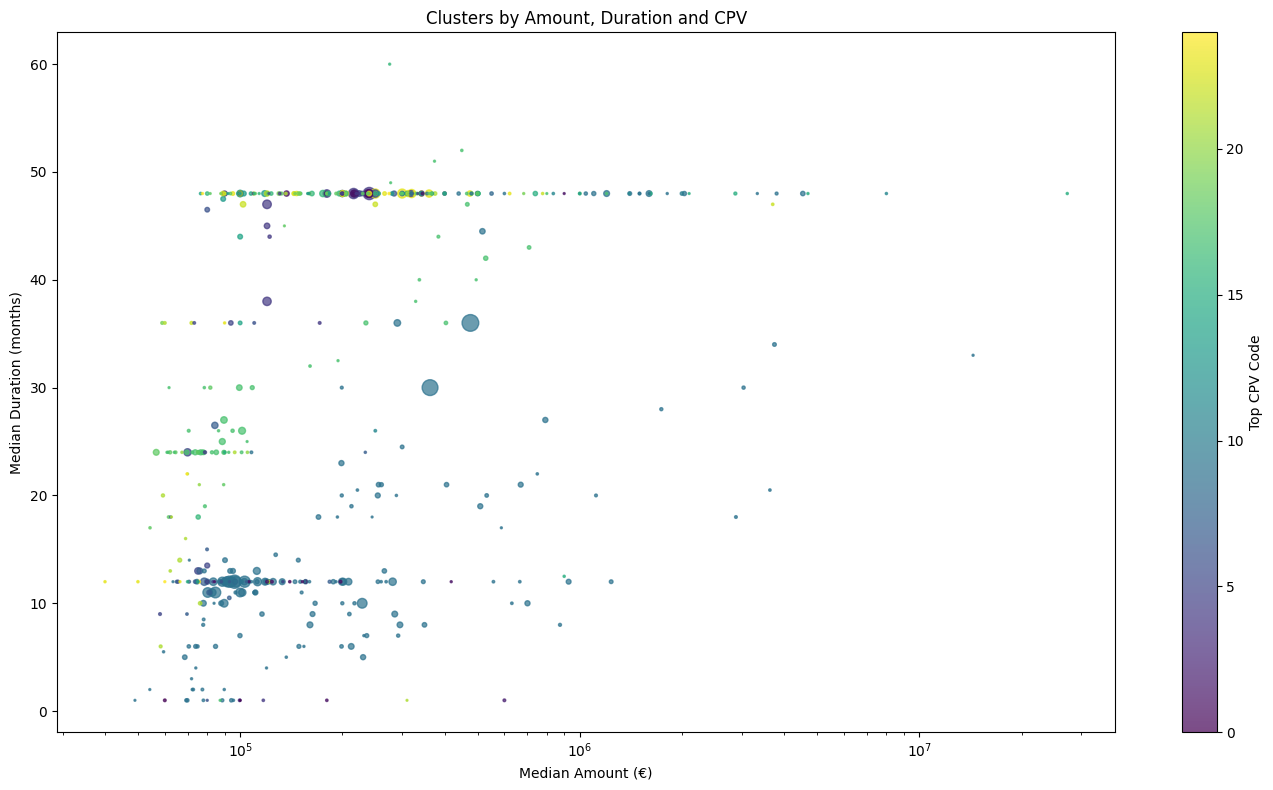

In [48]:
plt.figure(figsize=(14, 8))
scatter = plt.scatter(profiles_df['median_amount'],
                      profiles_df['median_duration'],
                      s=profiles_df['size']/30,
                      c=profiles_df['top_cpv'].astype('category').cat.codes,
                      alpha=0.7)
plt.xscale('log')
plt.xlabel('Median Amount (€)')
plt.ylabel('Median Duration (months)')
plt.title('Clusters by Amount, Duration and CPV')
plt.colorbar(scatter, label='Top CPV Code')
plt.tight_layout()

In [57]:
# For a specific cluster
cluster_id = 3  # One of your largest clusters
cluster_data = X_train_with_clusters[X_train_with_clusters['cluster'] == cluster_id]

# Top 5 CPV codes in this cluster
top_cpvs = cluster_data['codeCPV_2_3'].value_counts().head(5)
print(f"Top CPVs in cluster {cluster_id}:")
for cpv, count in top_cpvs.items():
    pct = count/len(cluster_data)*100
    print(f"  {cpv}: {count} ({pct:.1f}%)")

Top CPVs in cluster 3:
  45200000: 1227 (28.3%)
  79000000: 305 (7.0%)
  71300000: 283 (6.5%)
  45100000: 268 (6.2%)
  71200000: 235 (5.4%)


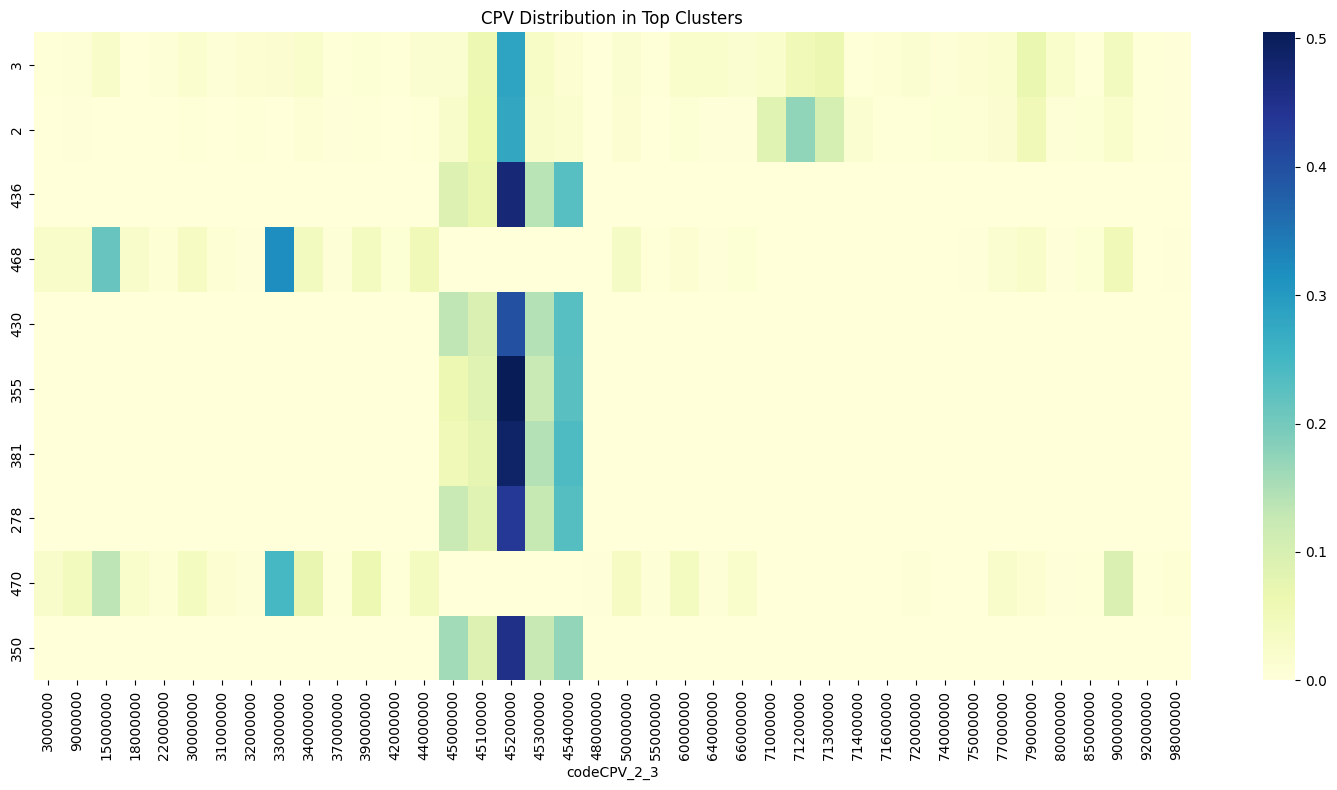

In [58]:
# Create a cross-tabulation of clusters vs CPV codes
cpv_cluster_cross = pd.crosstab(
    X_train_with_clusters['cluster'],
    X_train_with_clusters['codeCPV_2_3'],
    normalize='index'
)

# Plot as heatmap (for top clusters)
plt.figure(figsize=(15, 8))
sns.heatmap(cpv_cluster_cross.loc[top_10_clusters], cmap='YlGnBu')
plt.title('CPV Distribution in Top Clusters')
plt.tight_layout()

In [ ]:
# Get a test observation from your test dataset
test_index = 3
test_market = X_test.iloc[test_index].to_dict()

# Get the corresponding preprocessed test data
test_preproc = X_test_preproc[test_index:test_index+1]

# Apply PCA transformation (same as applied to training data)
test_pca = X_test_pca[test_index:test_index+1]

# Make the clusterer prediction ready (if not already done)
if not hasattr(clusterer, 'prediction_data_'):
    clusterer.generate_prediction_data()

# Use HDBSCAN's approximate_predict method to assign to a cluster
cluster_id, cluster_prob = hdbscan.approximate_predict(clusterer, test_pca)

# Get the cluster ID for this observation
predicted_cluster = cluster_id[0]
probability = cluster_prob[0]

# Get profile information for the predicted cluster
if predicted_cluster != -1:  # If not assigned to noise
    cluster_profile = profiles_df[profiles_df['cluster_id'] == predicted_cluster].iloc[0].to_dict()
    similar_message = f"Assigned to cluster {predicted_cluster} with probability {probability:.2f}"
else:
    # Handle noise case - find the nearest cluster
    distances = [np.min(np.linalg.norm(test_pca - clusterer.exemplars_[c], axis=1))
                 for c in range(len(clusterer.exemplars_))]
    nearest_cluster = np.argmin(distances)
    cluster_profile = profiles_df[profiles_df['cluster_id'] == nearest_cluster].iloc[0].to_dict()
    similar_message = f"Assigned as noise, but nearest to cluster {nearest_cluster}"

# Print results
print(f"\nTest Market - CPV: {test_market['codeCPV_2_3']}")
print(f"Amount: {test_market['montant']:,.2f}€, Duration: {test_market['dureeMois']} months")
print(similar_message)
print(f"Most similar contracts are in category: {cluster_profile['top_cpv']}")
print(f"Median amount in similar cluster: {cluster_profile['median_amount']:,.2f}€")
print(f"Median duration in similar cluster: {cluster_profile['median_duration']} months")


Test Market - CPV: 45300000
Amount: 799,047.10€, Duration: 24.0 months
Assigned to cluster 276 with probability 0.55
Most similar contracts are in category: 45200000.0
Median amount in similar cluster: 198,728.90€
Median duration in similar cluster: 23.0 months
